Populating the interactive namespace from numpy and matplotlib
typeCode:  4
typeSize:  16
shape:  (1, 111, 111)
numOfArrays:  16
shape:  (111, 111)


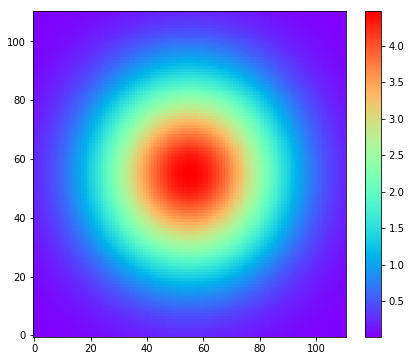

In [1]:
## plot plasma density

%pylab inline
import numpy as np
from matplotlib import pyplot as plt

from ReadBinary import *

filename = "GaussianPlasmaPBC/Wp2-x-GX-0.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

Wp2 = GetArrays(filename, 0, 1)[0,0,:,:]
print("shape: ", Wp2.shape)

shape = Wp2.shape

plt.figure(figsize=(7, 6*(shape[0]/shape[1])))
plt.imshow(np.real(Wp2[:,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

Populating the interactive namespace from numpy and matplotlib
typeCode:  4
typeSize:  16
shape:  (1, 111, 111)
numOfArrays:  1501


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (200, 111, 111)


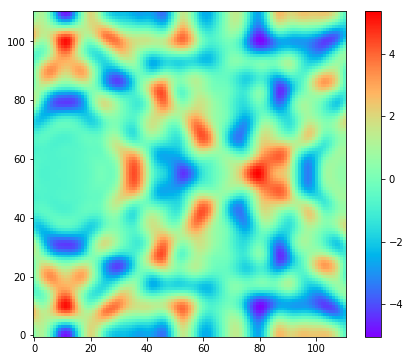

In [2]:
## animate Electric field

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
from ReadBinary import *

filename = "GaussianPlasmaPBC/E-x-GX-0.data"
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename, indStart=-200, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

shape = E.shape[1:]

plt.ion()
plt.figure(figsize=(7,6*(shape[0]/shape[1])))

for n in range(E.shape[0]):
    plt.clf()
    plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
    plt.colorbar()
    plt.pause(0.05)

In [9]:
E = GetArrays("GaussianPlasmaPBC/E-x-GX-0.data")[:, 0, :, :]

Ny = E.shape[1]
Nz = E.shape[2]
dy = 1/Ny
dz = 1/Nz
S = 0.99
dt = 1/np.sqrt(1/dy**2 + 1/dz**2)*S
print('dt : ', dt)


dt :  0.006306628048420559


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


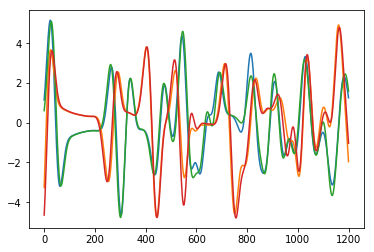

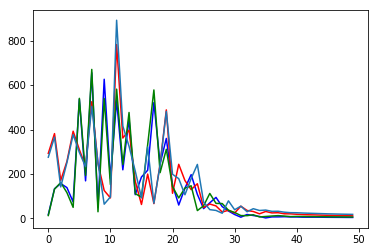

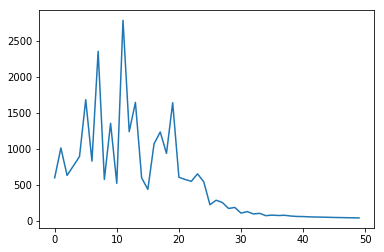

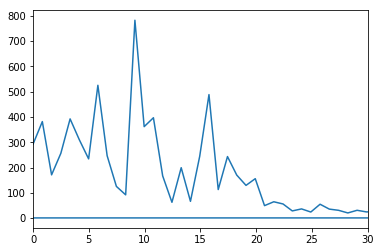

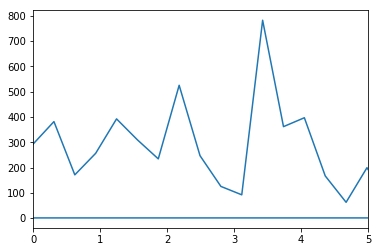

In [11]:
%pylab inline 

indy = int(0.25*E.shape[1])
indz = int(0.9*E.shape[2])

indt_start = 300

E_0 = E[indt_start:, indy, indz]
E_1 = E[indt_start:, indy, -indz]
E_2 = E[indt_start:, -indy, indz]
E_3 = E[indt_start:, -indy, -indz]
plot(np.real(E_0))
plot(np.real(E_1))
plot(np.real(E_2))
plot(np.real(E_3))
show()

Nt = len(E_0)
Nt_0 = int(Nt/2)
Nt_1 = Nt_0 + 50

E_f_0 = np.fft.fftshift(np.fft.fft(E_0))
E_f_1 = np.fft.fftshift(np.fft.fft(E_1))
E_f_2 = np.fft.fftshift(np.fft.fft(E_2))
E_f_3 = np.fft.fftshift(np.fft.fft(E_3))


plot(np.abs(E_f_0)[Nt_0:Nt_1], 'b')
plot(np.abs(E_f_1)[Nt_0:Nt_1], 'r')
plot(np.abs(E_f_2)[Nt_0:Nt_1], 'g')
plot(np.abs(E_f_3)[Nt_0:Nt_1])
show()

plot(np.abs(E_f_0)[Nt_0:Nt_1] + np.abs(E_f_1)[Nt_0:Nt_1] + np.abs(E_f_2)[Nt_0:Nt_1] + np.abs(E_f_3)[Nt_0:Nt_1])
show()

E_f_0 = np.fft.fft(E_1)
f = np.fft.fftfreq(len(E_0), d=dt)
plot(2.0*np.pi*f, np.abs(E_f_0))
xlim(0, 30)
show()

from scipy import constants
pitch = 127
plot(f*(constants.c/(pitch*constants.micro))/constants.tera, np.abs(E_f_0))
xlim(0, 5)
show()


/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


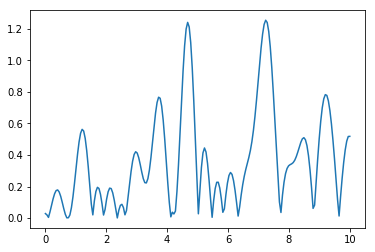

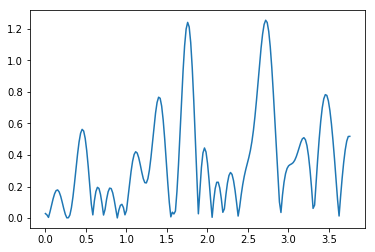

In [232]:

Nw = 200
w_max = 10

w = np.linspace(0, w_max, Nw)

Nt = len(E_0)
t = np.linspace(0, Nt*dt, Nt)

E_f2_0 = np.zeros(Nw)

for i in range(len(w)):
    w_i = w[i]
    E_f2_0[i] = np.sum(E_0 * np.exp(-1j*w_i*t))/Nt


plot(w, np.abs(E_f2_0))
show()

from scipy import constants
pitch = 127
plot(w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi), np.abs(E_f2_0))
show()
